<a href="https://colab.research.google.com/github/iceberg12/vietai-anlp/blob/main/Week1/BinaryClassification_m.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load dữ liệu

In [2]:
import tensorflow_datasets as tfds

In [3]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWUL3JQ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWUL3JQ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteWUL3JQ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [26]:
len(imdb['train']), len(imdb['test'])

(25000, 25000)

In [4]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

In [5]:
train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

for s, l in train_data:
  train_sentences.append(str(s.numpy()))
  train_labels.append(l.numpy())

for s, l in test_data:
  test_sentences.append(str(s.numpy()))
  test_labels.append(l.numpy())

In [6]:
train_sentences[0]

'b"This was an absolutely terrible movie. Don\'t be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie\'s ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor\'s like Christopher Walken\'s good name. I could barely sit through it."'

In [7]:
train_labels[0]

0

In [8]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [9]:
vocab_size = 10000
max_length = 120

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)

In [18]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, truncating='post', padding='post')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, truncating='post', padding='post')

In [22]:
padded_train_sequences.shape, padded_test_sequences.shape

((25000, 120), (25000, 120))

Logistic Regression

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, GlobalAveragePooling1D, Conv1D, Input, concatenate

In [33]:
embed_size = 64
model1 = Sequential()
model1.add(Embedding(vocab_size, output_dim=embed_size, input_length=max_length))
model1.add(Flatten())
model1.add(Dense(1, activation='sigmoid'))

model1.compile('adam', loss='binary_crossentropy', metrics=['acc'])


In [34]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7681      
Total params: 647,681
Trainable params: 647,681
Non-trainable params: 0
_________________________________________________________________


In [36]:
model1.fit(padded_train_sequences, train_labels, validation_data=(padded_test_sequences, test_labels), epochs=10)


Epoch 1/10
782/782 [==============================] - 10s 10ms/step - loss: 0.5968 - acc: 0.6510 - val_loss: 0.3836 - val_acc: 0.8263
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2419 - acc: 0.9089 - val_loss: 0.3876 - val_acc: 0.8248
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0946 - acc: 0.9823 - val_loss: 0.4279 - val_acc: 0.8202
Epoch 4/10
782/782 [==============================] - 7s 10ms/step - loss: 0.0280 - acc: 0.9992 - val_loss: 0.4720 - val_acc: 0.8196
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0108 - acc: 0.9997 - val_loss: 0.5083 - val_acc: 0.8196
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0050 - acc: 0.9999 - val_loss: 0.5485 - val_acc: 0.8188
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0027 - acc: 1.0000 - val_loss: 0.5777 - val_acc: 0.8199
Epoch 8/10
782/782 [==============================] - 7s 10ms/step -

Neural Network

In [43]:
embed_size = 64
model2 = Sequential()
model2.add(Embedding(vocab_size, output_dim=embed_size, input_length=max_length))
model2.add(Flatten())
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile('adam', loss='binary_crossentropy', metrics=['acc'])

In [44]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 64)           640000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 642,625
Trainable params: 642,625
Non-trainable params: 0
_________________________________________________________________


In [45]:
model1.fit(padded_train_sequences, train_labels, validation_data=(padded_test_sequences, test_labels), epochs=10)

Epoch 1/10
782/782 [==============================] - 8s 11ms/step - loss: 4.0905e-06 - acc: 1.0000 - val_loss: 0.9825 - val_acc: 0.8165
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 2.7567e-06 - acc: 1.0000 - val_loss: 1.0069 - val_acc: 0.8169
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 1.8805e-06 - acc: 1.0000 - val_loss: 1.0338 - val_acc: 0.8168
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 1.2959e-06 - acc: 1.0000 - val_loss: 1.0631 - val_acc: 0.8158
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 9.0652e-07 - acc: 1.0000 - val_loss: 1.0872 - val_acc: 0.8162
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 6.4629e-07 - acc: 1.0000 - val_loss: 1.1103 - val_acc: 0.8159
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 4.6710e-07 - acc: 1.0000 - val_loss: 1.1298 - val_acc: 0.8161
Epoch 8/10
782/782 [=====================

In [51]:
embed_size = 64
model3 = Sequential()
model3.add(Embedding(vocab_size, output_dim=embed_size, input_length=max_length))
model3.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model3.add(GlobalAveragePooling1D())
model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile('adam', loss='binary_crossentropy', metrics=['acc'])

In [52]:
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 120, 64)           640000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          41088     
_________________________________________________________________
global_average_pooling1d_4 ( (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_15 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 685,761
Trainable params: 685,761
Non-trainable params: 0
_______________________________________________

In [53]:
model1.fit(padded_train_sequences, train_labels, validation_data=(padded_test_sequences, test_labels), epochs=10)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 1.5950e-07 - acc: 1.0000 - val_loss: 1.2070 - val_acc: 0.8159
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 1.2995e-07 - acc: 1.0000 - val_loss: 1.2229 - val_acc: 0.8156
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 3.1043e-07 - acc: 1.0000 - val_loss: 1.3306 - val_acc: 0.8109
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 1.7890e-07 - acc: 1.0000 - val_loss: 1.2658 - val_acc: 0.8146
Epoch 5/10
782/782 [==============================] - 8s 11ms/step - loss: 9.2621e-08 - acc: 1.0000 - val_loss: 1.2710 - val_acc: 0.8150
Epoch 6/10
782/782 [==============================] - 8s 11ms/step - loss: 7.6355e-08 - acc: 1.0000 - val_loss: 1.2798 - val_acc: 0.8146
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 6.5475e-08 - acc: 1.0000 - val_loss: 1.2853 - val_acc: 0.8150
Epoch 8/10
782/782 [=====================

In [65]:
from tensorflow.keras.layers import concatenate, MaxPooling1D
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

In [69]:
embed_size = 64
input_layer = Input(shape=(None,))
layer = Embedding(vocab_size, output_dim=embed_size, input_length=max_length)(input_layer)
layer1 = Conv1D(filters=128, kernel_size=1, activation='relu')(layer)
layer3 = Conv1D(filters=64, kernel_size=3, activation='relu')(layer)
layer5 = Conv1D(filters=32, kernel_size=5, activation='relu')(layer)
layerpool = MaxPooling1D()(layer)
layer = concatenate([layer1, layer3, layer5, layerpool])
layer = GlobalAveragePooling1D()(layer)
layer = Dense(32, activation='relu')(layer)
layer = Dense(16, activation='relu')(layer)
output_layer = Dense(1, activation='sigmoid')(layer)

model = Model(
    inputs=input_layer,
    outputs=output_layer,
)
model.compile('adam', loss='binary_crossentropy', metrics=['acc'])

In [66]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, None, 64)     640000      input_10[0][0]                   
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, None, 128)    8320        embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, None, 64)     12352       embedding_14[0][0]               
____________________________________________________________________________________________

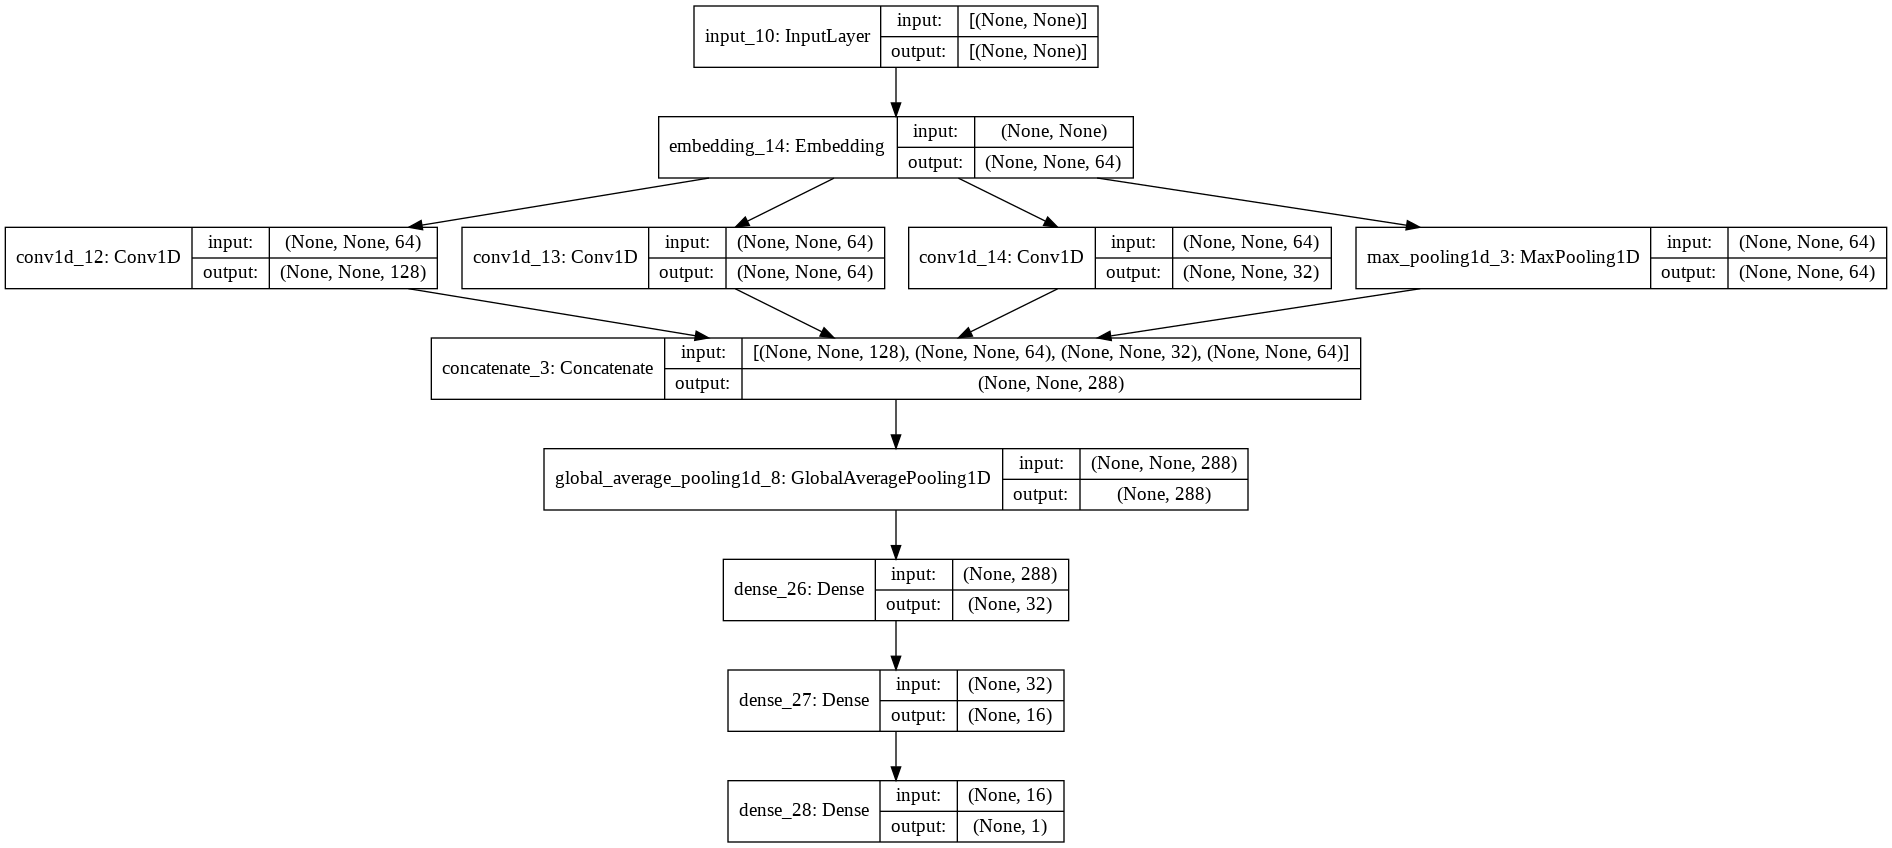

In [67]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [68]:
model1.fit(padded_train_sequences, train_labels, validation_data=(padded_test_sequences, test_labels), epochs=10)

Epoch 1/10
782/782 [==============================] - 8s 10ms/step - loss: 4.2002e-08 - acc: 1.0000 - val_loss: 1.3116 - val_acc: 0.8150
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 3.8631e-08 - acc: 1.0000 - val_loss: 1.3156 - val_acc: 0.8149
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 3.5762e-08 - acc: 1.0000 - val_loss: 1.3208 - val_acc: 0.8147
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 3.3067e-08 - acc: 1.0000 - val_loss: 1.3248 - val_acc: 0.8149
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 3.1107e-08 - acc: 1.0000 - val_loss: 1.3300 - val_acc: 0.8152
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 3.0099e-08 - acc: 1.0000 - val_loss: 1.3348 - val_acc: 0.8151
Epoch 7/10
782/782 [==============================] - 7s 10ms/step - loss: 2.7631e-08 - acc: 1.0000 - val_loss: 1.3397 - val_acc: 0.8148
Epoch 8/10
782/782 [======================